# Task No: 4

To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset :

https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

Decision Tree Algorithm

Author: Shalin sharma

Email: shalinsharma1807@gmail.com



## Importing the libraries

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

## Importing the dataset

In [11]:
df=pd.read_csv('Iris.csv')

Overview Of Dataset

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Basic Information Of The Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Checking for Null/NaN entries

In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
print(df)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


Checking Counts of the present Species

In [17]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Data Distribution Species-Wise

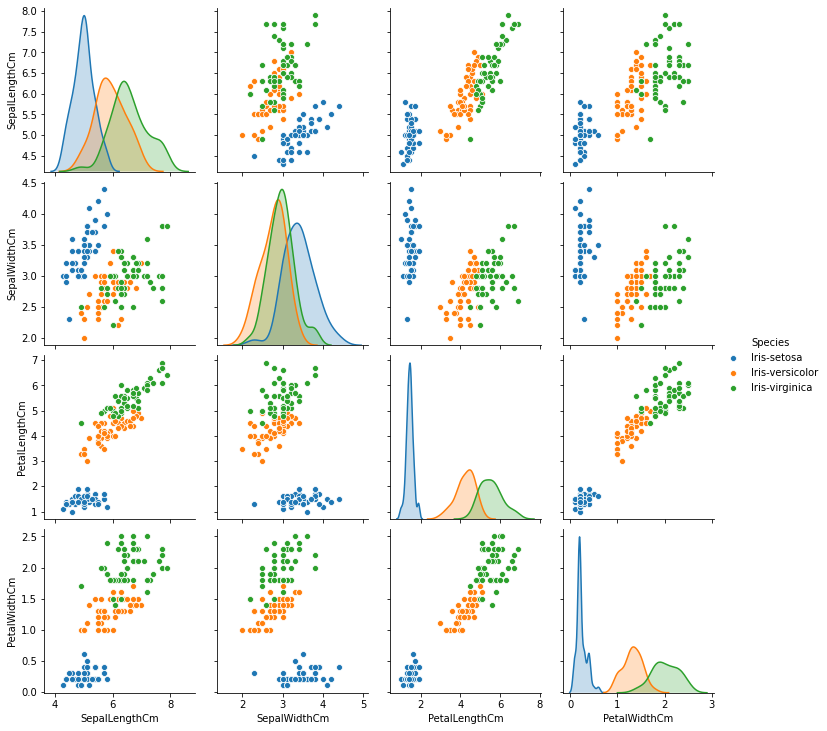

In [19]:
import seaborn as sns
sns.pairplot(df.iloc[:,[1,2,3,4,5]],hue='Species')

## Splitting the dataset

In [23]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [24]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y = pd.get_dummies(y)

In [26]:
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


## Splitting the dataset into the Training set and Test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1)

In [30]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
91                 6.1               3.0                4.6               1.4
135                7.7               3.0                6.1               2.3
69                 5.6               2.5                3.9               1.1
128                6.4               2.8                5.6               2.1
114                5.8               2.8                5.1               2.4
..                 ...               ...                ...               ...
133                6.3               2.8                5.1               1.5
137                6.4               3.1                5.5               1.8
72                 6.3               2.5                4.9               1.5
140                6.7               3.1                5.6               2.4
37                 4.9               3.6                1.4               0.1

[120 rows x 4 columns]


In [31]:
print(y_train)

     setosa  versicolor  virginica
91        0           1          0
135       0           0          1
69        0           1          0
128       0           0          1
114       0           0          1
..      ...         ...        ...
133       0           0          1
137       0           0          1
72        0           1          0
140       0           0          1
37        1           0          0

[120 rows x 3 columns]


In [32]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
14                 5.8               4.0                1.2               0.2
98                 5.1               2.5                3.0               1.1
75                 6.6               3.0                4.4               1.4
16                 5.4               3.9                1.3               0.4
131                7.9               3.8                6.4               2.0
56                 6.3               3.3                4.7               1.6
141                6.9               3.1                5.1               2.3
44                 5.1               3.8                1.9               0.4
29                 4.7               3.2                1.6               0.2
120                6.9               3.2                5.7               2.3
94                 5.6               2.7                4.2               1.3
5                  5.4               3.9                1.7     

In [33]:
print(y_test)

     setosa  versicolor  virginica
14        1           0          0
98        0           1          0
75        0           1          0
16        1           0          0
131       0           0          1
56        0           1          0
141       0           0          1
44        1           0          0
29        1           0          0
120       0           0          1
94        0           1          0
5         1           0          0
102       0           0          1
51        0           1          0
78        0           1          0
42        1           0          0
92        0           1          0
66        0           1          0
31        1           0          0
35        1           0          0
90        0           1          0
84        0           1          0
77        0           1          0
40        1           0          0
125       0           0          1
99        0           1          0
33        1           0          0
19        1         

## Training the Decision Tree Classification model on the Training set

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Actual Decision tree

In [39]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

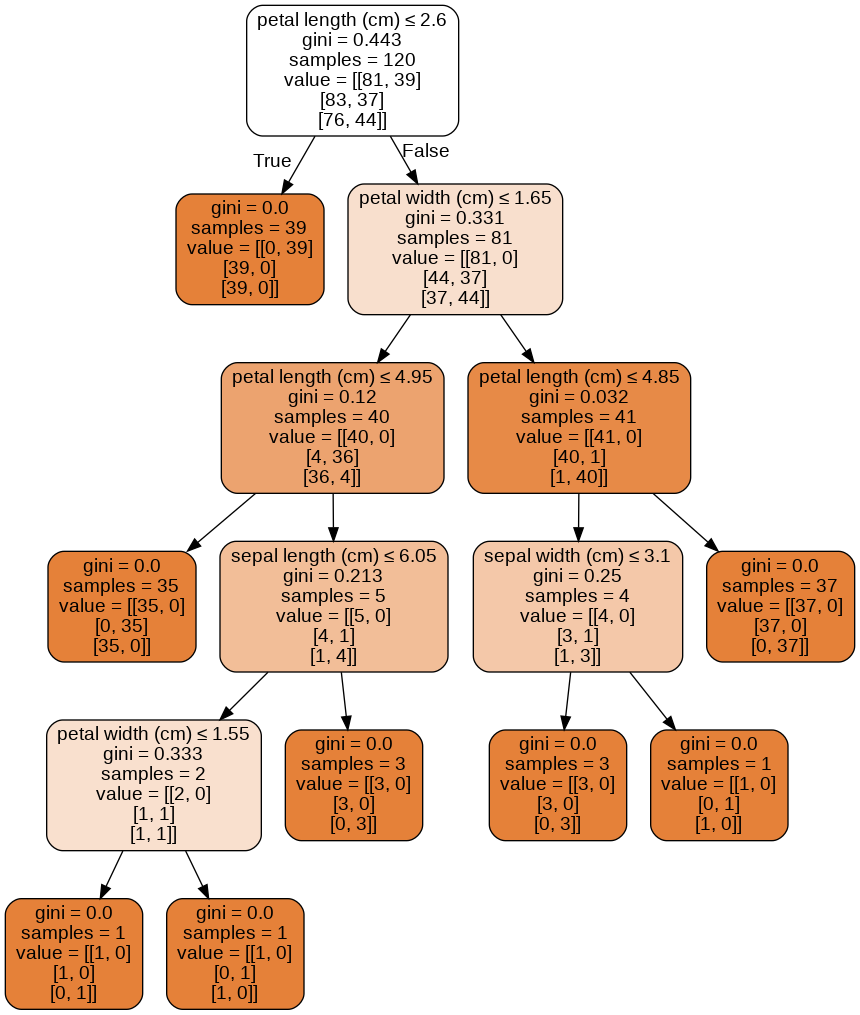

In [40]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

It provides the Gini impurity, the total number of samples, the classification criteria and the number of samples on the left/right sides.


## Predicting the Test set results

In [41]:
y_pred = dt.predict(X_test)

The numbers on the diagonal of the confusion matrix correspond to correct predictions. When there are more than two potential outcomes, we simply extend the number of columns and rows in the confusion matrix.

In [43]:
y_preds=dt.predict(X_test)
dt.score(X_test,y_test)

0.9666666666666667

 The decision tree classifier could get a very high accuracy with 96.67 %

In [42]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

As we can see, our decision tree classifier correctly classified 29/30 plants.